# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive, files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Klasifikasiygini.csv'

# Load the dataset
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,CustomerID,TransactionCount,TotalAmount,AverageAmount,LastTransactionDate,CustGender,Recency,Age,ClusterLabel
0,C1010011,1,356.0,356.0,2016-09-08,M,92,33,Medium Value Customers
1,C1010012,1,1499.0,1499.0,2016-08-14,M,117,22,High Value Customers
2,C1010014,1,1205.0,1205.0,2016-01-08,F,336,24,Low Value Customers
3,C1010018,1,30.0,30.0,2016-09-15,F,85,26,Medium Value Customers
4,C1010031,2,1864.0,932.0,2016-04-08,M,245,32,Loyal Customers


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Memilih fitur dan label target
X = df[['TransactionCount', 'TotalAmount', 'AverageAmount', 'Recency']]
y = df['ClusterLabel']

# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran data hasil splitting
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 502471
Jumlah data uji: 125618


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# **Random Forest**
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
# Prediksi pada data test
y_pred_rf = rf_model.predict(X_test)


# **KNN**
knn_model = KNeighborsClassifier(n_neighbors=5,  weights='distance')
knn_model.fit(X_train, y_train)
# Prediksi pada data test
y_pred_knn = knn_model.predict(X_test)


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
# Prediksi pada data test
y_pred_dt = dt_model.predict(X_test)


# Logistic Regression
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000) # Increased max_iter
lr_model.fit(X_train, y_train)
# Prediksi pada data test
y_pred_lr = lr_model.predict(X_test)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Evaluasi model Random Forest
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Evaluasi model KNN
print("\n=== KNN ===")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1-Score:", f1_score(y_test, y_pred_knn, average='weighted'))

# Evaluasi model Decision Tree
print("\n=== Decision Tree ===")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1-Score:", f1_score(y_test, y_pred_dt, average='weighted'))

# Evaluasi model Logistic Regression
print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr, average='weighted'))

=== Random Forest ===
                        precision    recall  f1-score   support

  High Value Customers       1.00      1.00      1.00     20935
   Low Value Customers       1.00      1.00      1.00     24472
       Loyal Customers       1.00      1.00      1.00     13892
Medium Value Customers       1.00      1.00      1.00     66319

              accuracy                           1.00    125618
             macro avg       1.00      1.00      1.00    125618
          weighted avg       1.00      1.00      1.00    125618

Confusion Matrix:
Accuracy: 0.9999124329315863
F1-Score: 0.9999124290566294

=== KNN ===
                        precision    recall  f1-score   support

  High Value Customers       1.00      1.00      1.00     20935
   Low Value Customers       1.00      1.00      1.00     24472
       Loyal Customers       1.00      1.00      1.00     13892
Medium Value Customers       1.00      1.00      1.00     66319

              accuracy                           1.0

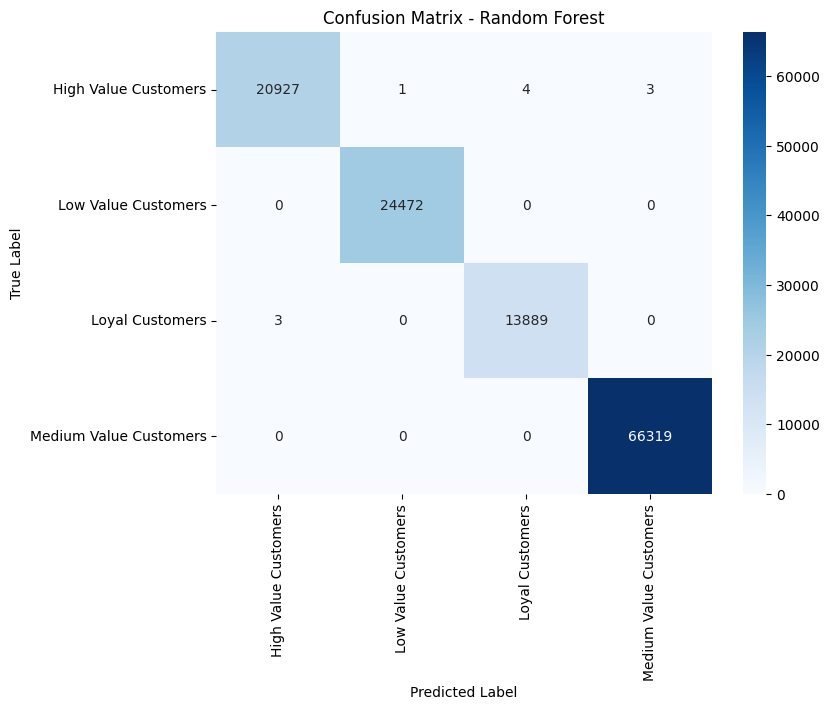

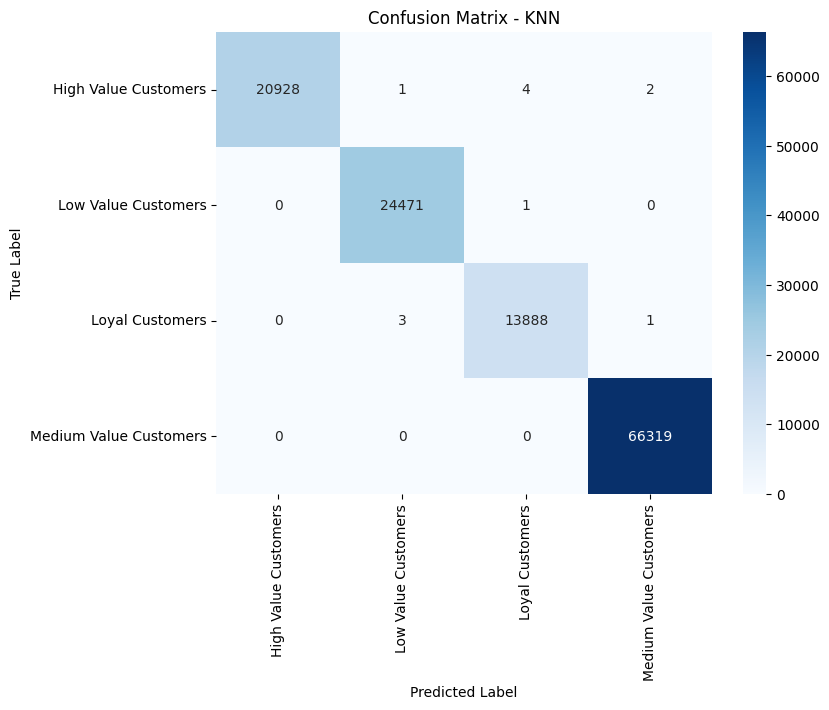

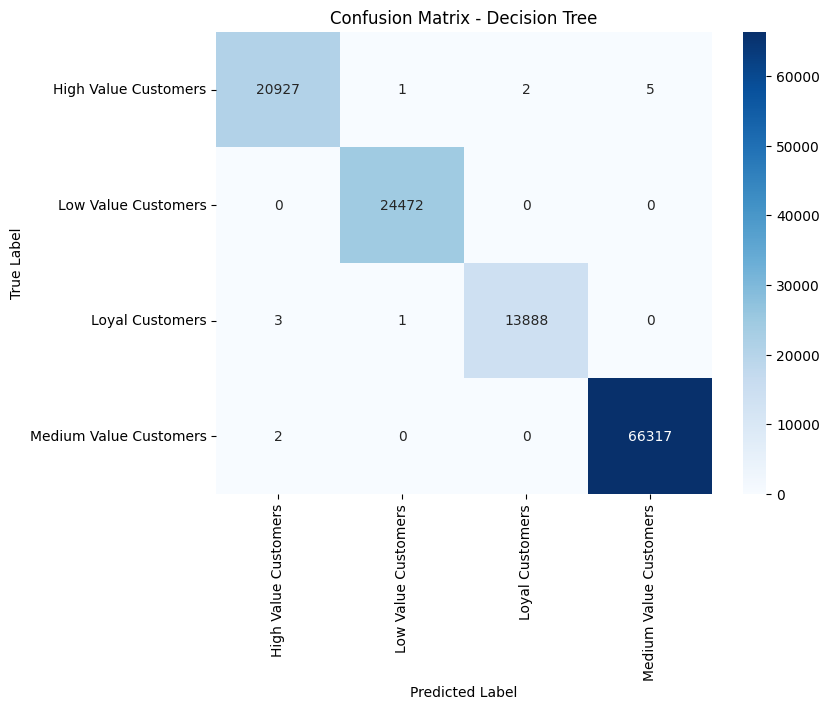

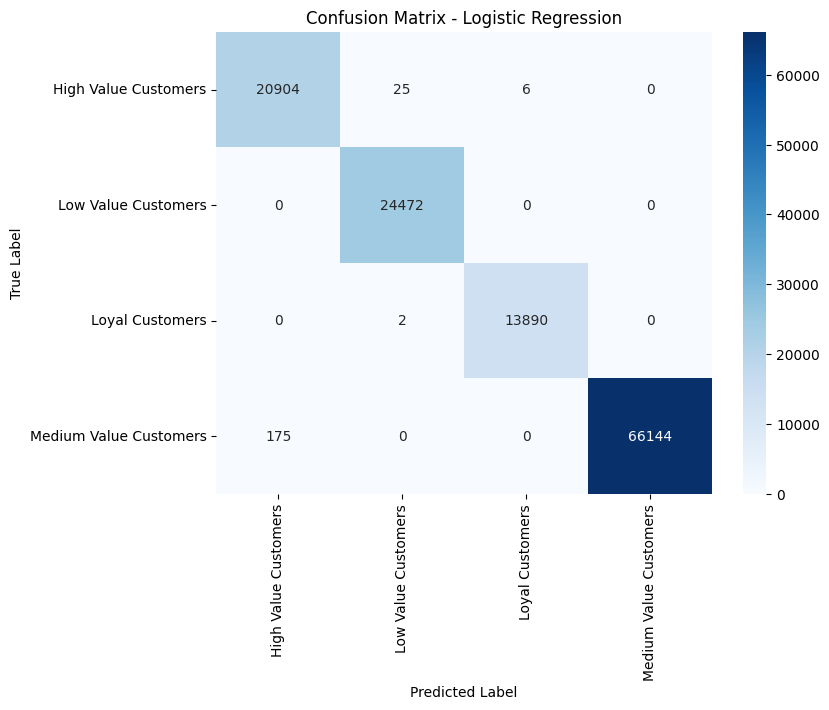

In [ ]:
# Visualisasi Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualisasi Confusion Matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualisasi Confusion Matrix untuk Decision Tree
cm_knn = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualisasi Confusion Matrix untuk Logistic Regression
cm_knn = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Tuning Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best score for Random Forest: 0.9998845726569557
Tuned Random Forest Classification Report:
                         precision    recall  f1-score   support

  High Value Customers       1.00      1.00      1.00     20935
   Low Value Customers       1.00      1.00      1.00     24472
       Loyal Customers       1.00      1.00      1.00     13892
Medium Value Customers       1.00      1.00      1.00     66319

              accuracy                           1.00    125618
             macro avg       1.00      1.00      1.00    125618
          weighted avg       1.00      1.00      1.00    125618



# **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.

1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

Best score for Random Forest: 0.9998845726569557
Tuned Random Forest Classification Report:
                             precision    recall  f1-score   support

High Value Customers         1.00          1.00      1.00     20935
Low Value Customers          1.00          1.00      1.00     24472
Loyal Customers              1.00          1.00      1.00     13892
Medium Value Customers       1.00          1.00      1.00     66319

              accuracy                               1.00    125618
             macro avg       1.00          1.00      1.00    125618
          weighted avg       1.00          1.00      1.00    125618


# **e. Analisis Hasil Evaluasi Model Klasifikasi**

Hasil :
Hasil Klasifikasi menunjukkan bahwa keempat model memiliki akurasi dan f1-score sebesar 99%.

Identifikasi masalah :
Model-model tersebut kemungkinan mengalami overfitting karena distribusi antar label tidak terbagi dengan merata atau terdapat salah satu label yang terlalu menjomplang tinggi dibandingkan label lainnya.

Solusi :
1. Melakukan penanganan overfitting seperti regularization pada keempat model tersebut untuk mengurangi adanya overfitting.
2. Mengumpulkan variasi data yang lebih banyak lagi agar distribusi antar label tidak terlalu menjomplang.
3. Melakukan cross-validation pada verifikasi model.